# LeetCode No. 3: Longest substring without repeating characters

## Description of the topic
Given a string, you find out which does not contain a repeated character longest substring length.
<div class="alert alert-block alert-info">
<b>Example 1:</b> <br>
Input :  " abcabcbb " <br>
Output :  3  <br>
Explanation : Because the longest substring of no repeating characters is " abc " , its length is 3 .
</div>



## Approach 1: Sliding Window
In the naive approaches, we repeatedly check a substring to see if it has duplicate character. But it is unnecessary. If a substring $s_{ij}$ from index i to j - 1 is already checked to have no duplicate characters. We only need to check if $s[j]$ is already in the substring $s_{ij}$. By using HashSet as a sliding window, checking if a character in the current can be done in $O(1)$.

We use HashSet to store the characters in current window $[i, j)$. Then we slide the index j to the right. If it is not in the HashSet, we slide j further. Doing so until $s[j] $ is already in the HashSet. At this point, we found the maximum size of substrings without duplicate characters start with index i. If we do this for all i, we get our answer.

1. If the character currently traversed has never appeared, then directly expand the right border;
2. If the currently traversed character has appeared, reduce the window (the left index moves to the right), and then continue to observe the character currently traversed;
3. Repeat (1) (2) until the left index can no longer move;
4. Maintain a result res, update the result res with the window size that has appeared each time, and finally return to res to get the result.

Time complexity : $O(2n)=O(n)$. In the worst case each character will be visited twice by i and j.

## Approach 2: Sliding Window optimize
The above solution requires at most 2n steps. In fact, it could be optimized to require only n steps. Instead of using a set to tell if a character exists or not, we could define a mapping of the characters to its index. Then we can skip the characters immediately when we found a repeated character.

The reason is that if $s[j]$ have a duplicate in the range $[i, j)$ with index $j'$, we don't need to increase i little by little. We can skip all the elements in the range $[i, j']$ and let i to be $j' + 1$
directly.
 
Create a 256-bit integer array of fregs that is used to map the characters to their occurrences.

Maintain a **sliding window**, there are no repeated characters in the window, to expand the size of the window as much as possible, the window keeps sliding to the right.



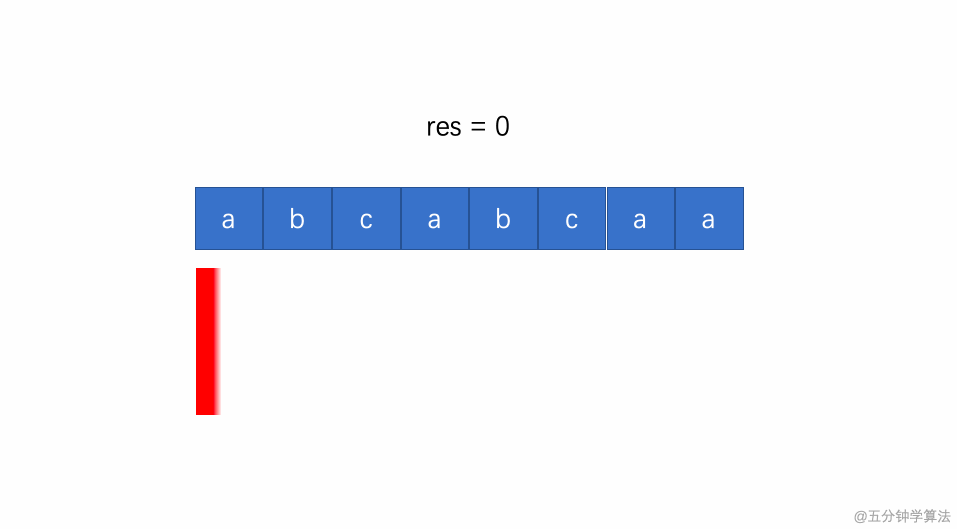
https://camo.githubusercontent.com/589cdbc727512afe311e24b856c2ee0f45844742/68747470733a2f2f6275636b65742d313235373132363534392e636f732e61702d6775616e677a686f752e6d7971636c6f75642e636f6d2f626c6f672f6f326163772e676966

In [2]:
def lengthOfLongestSubstring(s: str) -> int:
    start = maxLen = 0
    usedChar = {}
    for i in range(len(s)):
        if s[i] in usedChar and start <= usedChar[s[i]]:
            start = usedChar[s[i]] + 1
        else:
            maxLen = max(maxLen,i-start+1)

        usedChar[s[i]] = i
    return maxLen

print(lengthOfLongestSubstring("abcabcbb"))

3
